# Assignment (Healthcare and Artificial Intelligence)
The objective of this assignment is to get you familiarize with  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://iiitaphyd-my.sharepoint.com/personal/manasa_k_research_iiit_ac_in/_layouts/15/onedrive.aspx?ct=1622206906840&or=OWA).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `name.ipynb` and submit the notebook file on Github Repo with plots/vizualizations saved.


In [1]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

In [2]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [3]:
opt = {
    'image_size': 32,
    'is_grayscale': True,
    'val_split': 0.75
}

### Load Dataset

In [4]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [5]:
# Loading the dataset
# eg.
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32)


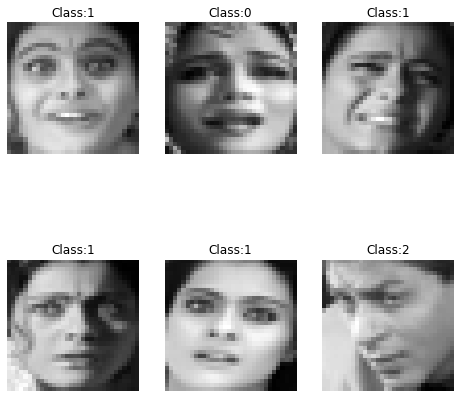

In [6]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

In [7]:
dirpath = './dataset/IIIT-CFW/'
X_1,y_1 = load_data(dirpath)
N_1,H_1,W_1 = X_1.shape[0:3]
C = 1 if opt['is_grayscale'] else X_1.shape[3]

Dataset shape: (672, 32, 32)


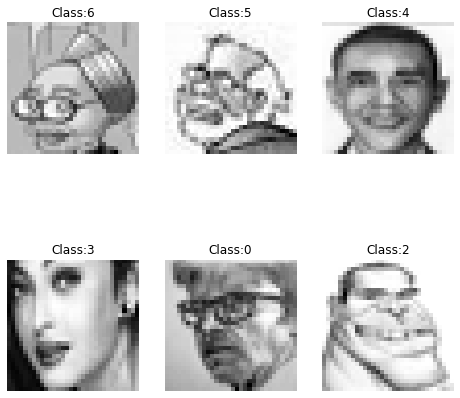

In [8]:
# Show sample images
ind = np.random.randint(0,y_1.shape[0],6)
disply_images(X_1[ind,...],y_1[ind], row=2,col=3)

In [9]:
dirpath = './dataset/Yale_face_database/'
X_2,y_2 = load_data(dirpath)
N_2,H_2,W_2 = X_2.shape[0:3]
C = 1 if opt['is_grayscale'] else X_2.shape[3]

Dataset shape: (165, 32, 32)


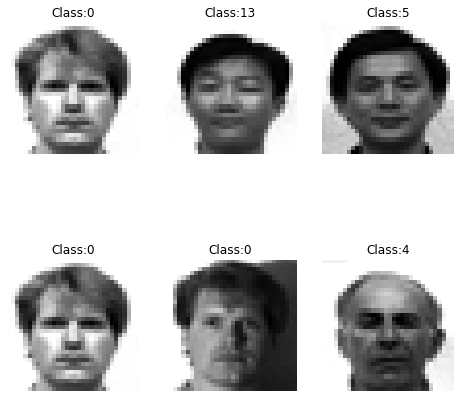

In [10]:
# Show sample images
ind = np.random.randint(0,y_2.shape[0],6)
disply_images(X_2[ind,...],y_2[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features


---


In [11]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

In [12]:
X_1 = X_1.reshape((N_1,H_1*W_1*C))

In [13]:
X_2 = X_2.reshape((N_2,H_2*W_2*C))

In [14]:
dirpath = './dataset/IMFDB/'
dirpath1 = './dataset/IIIT-CFW/'
dirpath2 = './dataset/Yale_face_database/'

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [15]:
def get_pca(X,k):
    pca = PCA(n_components = k) # this is like scaling of transform data will be done if whiten = True
    X_k = pca.fit_transform(X)
    
    return X_k, pca


###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [16]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    
    kpca = KernelPCA(n_components=k, kernel=kernel, degree =degree )
    X_k = pca.fit_transform(X)

    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    return X_k, kpca

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.


Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [17]:
def get_lda(X,y, k):
    
    
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    
    return X_k, lda

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [18]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
    
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X_transformed,y)
    
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    
    return X_k, klda

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.


In [19]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 



In [20]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 


1(b). How many eigen vectors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples and make a convincing argument.
   

1(c). Reconstruct  the  image  back for each case


In [21]:
def reconstruct_images(eigenvectors, X, k, title):

    X_k, pca = get_pca(X,k)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.title(title)
    plt.ylabel('cumulative explained variance ratio')
    plt.show()
    reconstruct_X = pca.inverse_transform(X_k)

    
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    
    return X_k, reconstruct_X    

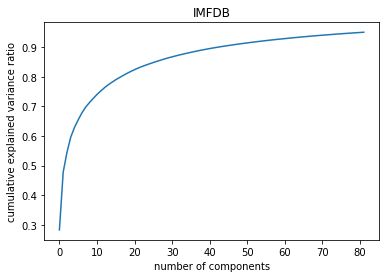

IMFDB


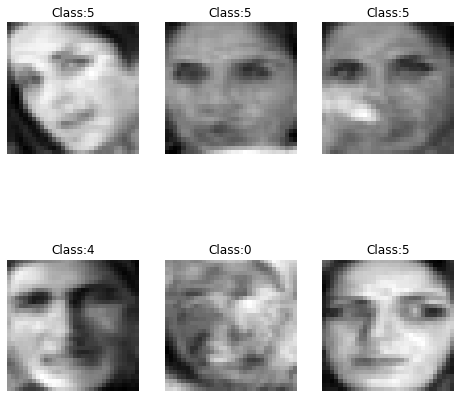

Reconstruction Error:0.03627918546920793


In [22]:
X_k, reconstruct_X = reconstruct_images(_,X,0.95, 'IMFDB')
X_reconstruced = reconstruct_X.reshape((N,H,W))
print("IMFDB")
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstruced[ind,...],y[ind], row=2,col=3)
print("Reconstruction Error:"+ str(np.sqrt(np.mean((X - reconstruct_X)**2))))


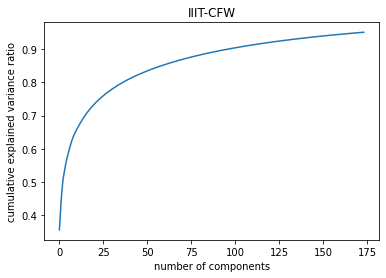

IIIT-CFW


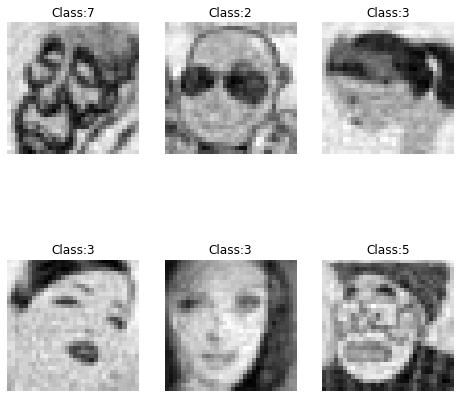

Reconstruction Error:0.05985837413599591


In [23]:
X_k, reconstruct_X = reconstruct_images(_,X_1,0.95, 'IIIT-CFW')
X_reconstruced = reconstruct_X.reshape((N_1,H_1,W_1))
print("IIIT-CFW")
ind = np.random.randint(0,y_1.shape[0],6)
disply_images(X_reconstruced[ind,...],y_1[ind], row=2,col=3)
print("Reconstruction Error:"+ str(np.sqrt(np.mean((X_1 - reconstruct_X)**2))))


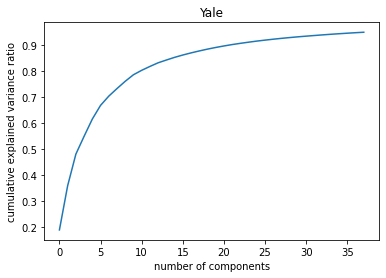

Yale


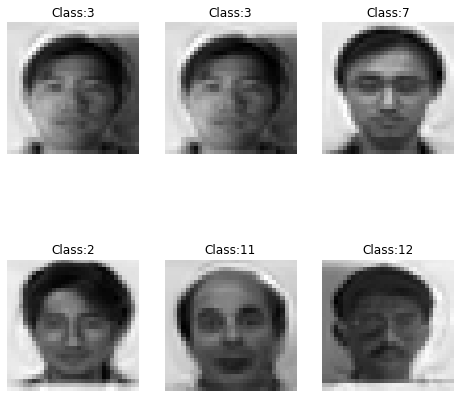

Reconstruction Error:0.050869561259709234


In [24]:
X_k, reconstruct_X = reconstruct_images(_,X_2,38, 'Yale')
X_reconstruced = reconstruct_X.reshape((N_2,H_2,W_2))
print("Yale")

ind = np.random.randint(0,y_2.shape[0],6)
disply_images(X_reconstruced[ind,...],y_2[ind], row=2,col=3)
print("Reconstruction Error:"+ str(np.sqrt(np.mean((X_2 - reconstruct_X)**2))))


1(d). Which person/identity is difficult to represent compactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers
 

IMFDB
Class reconstruction error 0 : 0.032856860984376644
Class reconstruction error 1 : 0.03623852309655489
Class reconstruction error 2 : 0.03516817471186626
Class reconstruction error 3 : 0.03790348400886258
Class reconstruction error 4 : 0.03767651009387202
Class reconstruction error 5 : 0.0356873097445959
Class reconstruction error 6 : 0.03704724712853208
Class reconstruction error 7 : 0.03738387211713038


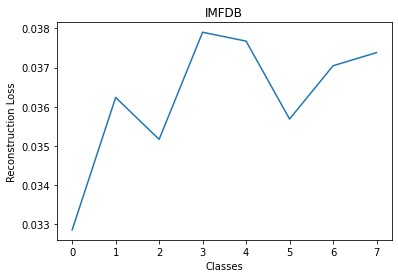

Max reconstruction error for class: 3

IIIT-CFM
Class reconstruction error 0 : 0.05479198611338655
Class reconstruction error 1 : 0.06089849617848549
Class reconstruction error 2 : 0.05353075391320588
Class reconstruction error 3 : 0.056668816917913145
Class reconstruction error 4 : 0.060118518094467256
Class reconstruction error 5 : 0.06440049401200654
Class reconstruction error 6 : 0.06344739104648892
Class reconstruction error 7 : 0.06103069750340078


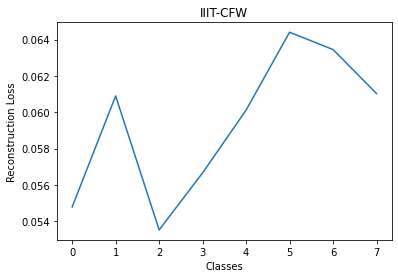

Max reconstruction error for class: 5

Yale
Class reconstruction error 0 : 0.05360284813858893
Class reconstruction error 1 : 0.050394687871534
Class reconstruction error 2 : 0.05499861723550433
Class reconstruction error 3 : 0.04935457304519462
Class reconstruction error 4 : 0.045570404551651386
Class reconstruction error 5 : 0.049947977219107216
Class reconstruction error 6 : 0.05268022112390524
Class reconstruction error 7 : 0.05560190857762522


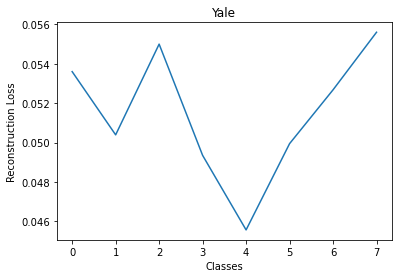

Max reconstruction error for class: 7


In [25]:
# Doing for Yale : 
print('IMFDB')
X_k, pca = get_pca(X, 0.95)
errs = []
for i in range(8):
    # get the projected class data
    class_data = X_k[y==i]
    # Reconstructed data from k dimensions
    rec_class = pca.inverse_transform(class_data)
    # Show the reconstruction error
    er = np.sqrt(np.mean((X[y==i] - rec_class)**2))
    print("Class reconstruction error",i,":",er)
    errs.append(er)
errs = np.array(errs)
plt.plot(errs)
plt.title('IMFDB')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Classes')
plt.show()

max_err_class = np.argmax(errs)
print("Max reconstruction error for class:",max_err_class)

# Doing for IIIT-CFM : 
print('\nIIIT-CFM')
X_k,pca_1 = get_pca(X_1, 0.95)
errs1 = []
for i in range(8):
    # get the projected class data
    class_data = X_k[y_1==i]
    # Reconstructed data from k dimensions
    rec_class = pca_1.inverse_transform(class_data)
    # Show the reconstruction error
    er = np.sqrt(np.mean((X_1[y_1==i] - rec_class)**2))
    print("Class reconstruction error",i,":",er)
    errs1.append(er)
errs1 = np.array(errs1)
plt.plot(errs1)
plt.title('IIIT-CFW')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Classes')
plt.show()
max_err_class1 = np.argmax(errs1)
print("Max reconstruction error for class:",max_err_class1)   

# Doing for Yale : 
print('\nYale')
X_k,pca_2 = get_pca(X_2, 0.95)
errs2 = []
for i in range(8):
    # get the projected class data
    class_data = X_k[y_2==i]
    # Reconstructed data from k dimensions
    rec_class = pca_2.inverse_transform(class_data)
    # Show the reconstruction error
    er = np.sqrt(np.mean((X_2[y_2==i] - rec_class)**2))
    print("Class reconstruction error",i,":",er)
    errs2.append(er)
errs2 = np.array(errs2)
plt.plot(errs2)
plt.title('Yale')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Classes')
plt.show()

max_err_class2 = np.argmax(errs2)
print("Max reconstruction error for class:",max_err_class2)

2(a) Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. Write code from scratch making Classifer as a class and functions of training, validation and confusion matrix etc.

2(b) Which method works well? Do a comparitive study. 



In [26]:
## MLP

class MLPCLASS():
    def __init__(self, hidden_layers, max_iter):
        self.model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=max_iter,activation = 'relu',solver='adam',random_state=1)
        
        
    def training(self,X_train, y_train):
        self.model.fit(X_train,y_train)

        
    def validate(self,X_test,y_test ):
        y_pred = self.model.predict(X_test)
        test_accuracy, cm = self.confusion_matrix(X_test, y_test, y_pred )
        return test_accuracy, cm
    
    def confusion_matrix(self,X_test,y_test, y_pred):
        cm = confusion_matrix(y_test,y_pred)
        test_accuracy= self.model.score(X_test,y_test)
        return test_accuracy, cm


In [27]:
def MLP(X,y, hidden_layers, max_iter):
    X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)
    obj = MLPCLASS(hidden_layers,max_iter)
    obj.training(X_train, y_train)
    test_accuracy, cm = obj.validate(X_test,y_test)
    return test_accuracy, cm

In [28]:
test_accuracy, cm = MLP(X,y, (1000,1000),350)
print("Raw IMFDW with MLP : " + str(test_accuracy*100))

test_accuracy, cm = MLP(X_1,y_1, (1000,1000),350)
print("Raw IIIT-CFW with MLP : " + str(test_accuracy*100))

test_accuracy, cm = MLP(X_2,y_2, (1000,1000),350)
print("Raw YALE with MLP : " + str(test_accuracy*100))

Raw IMFDW with MLP : 75.0
Raw IIIT-CFW with MLP : 41.66666666666667
Raw YALE with MLP : 95.23809523809523


In [29]:
## MLP with PCA

def MLP_PCA(X, y, k , hidden_layers, max_iter):
    X_k, pca = get_pca(X,k)
    test_accuracy, cm = MLP(X_k,y,hidden_layers,max_iter )
    return test_accuracy, cm


## MLP with LDA

def MLP_LDA(X, y, k , hidden_layers, max_iter):
    X_k, lda = get_lda(X,y,k)
    test_accuracy, cm = MLP(X_k, y,hidden_layers,max_iter )
    return test_accuracy, cm


## MLP with KPCA

def MLP_KPCA(X, y, k , hidden_layers, max_iter):
    X_k, pca = get_kernel_pca(X,k)
    test_accuracy, cm = MLP(X_k, y,hidden_layers,max_iter )
    return test_accuracy, cm

## MLP with KLDA

def MLP_KLDA(X, y, k , hidden_layers, max_iter):
    X_k, lda = get_kernel_lda(X,y,k)
    test_accuracy, cm = MLP(X_k, y,hidden_layers,max_iter )
    return test_accuracy, cm

## MLP with VGG_Face

def MLP_VGG(dirpath, y, hidden_layers, max_iter):
    
    X_k = get_vgg_features(dirpath)
    test_accuracy, cm = MLP(X_k, y,hidden_layers,max_iter)
    return test_accuracy, cm

## MLP with ResNet_Face

def MLP_ResNet(dirpath, y, hidden_layers, max_iter):
    X_k = get_resnet_features(dirpath)
    test_accuracy, cm = MLP(X_k, y,hidden_layers,max_iter)
    return test_accuracy, cm

In [30]:
## For IMFDB

print(' IMFDB :')
acc =[]
lbl= []
test_accuracy, cm = MLP_PCA(X,y, 0.95, (1000,1000),350)
print("PCA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('PCA')

test_accuracy, cm = MLP_LDA(X,y, None, (1000,1000),350)
print("LDA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('LDA')

test_accuracy, cm = MLP_VGG(dirpath,y, (1000,1000),350)
print("VGG with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('VGG')

test_accuracy, cm = MLP_ResNet(dirpath,y, (1000,1000),350)
print("ResNet with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('ResNet')

test_accuracy, cm = MLP_KPCA(X,y, 0.95, (1000,1000),350)
print("Kernel PCA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('Kernel PCA')

test_accuracy, cm = MLP_KLDA(X,y, None, (1000,1000),350)
print("Kernel LDA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('Kernel LDA')

X_k = get_vgg_features(dirpath)
test_accuracy, cm = MLP_PCA(X_k,y, 0.95, (1000,1000),350)
print("VGG + PCA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('VGG + PCA')

X_k = get_resnet_features(dirpath)
test_accuracy, cm = MLP_PCA(X_k,y, 0.95, (1000,1000),350)
print("ResNet + PCA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('ResNet + PCA')


X_k = get_vgg_features(dirpath)
test_accuracy, cm = MLP_LDA(X_k,y, None, (1000,1000),350)
print("VGG + LDA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('VGG + LDA')

X_k = get_resnet_features(dirpath)
test_accuracy, cm = MLP_LDA(X_k,y, None, (1000,1000),350)
print("ResNet + LDA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('ResNet + LDA')

X_k = get_vgg_features(dirpath)
test_accuracy, cm = MLP_KPCA(X_k,y, 0.95, (1000,1000),350)
print("VGG + Kernel PCA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('VGG + Kernel PCA')

X_k = get_resnet_features(dirpath)
test_accuracy, cm = MLP_KPCA(X_k,y, 0.95, (1000,1000),350)
print("ResNet + Kernel PCA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('ResNet + Kernel PCA')

X_k = get_vgg_features(dirpath)
test_accuracy, cm = MLP_KLDA(X_k,y, None, (1000,1000),350)
print("VGG + Kernel LDA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('VGG + Kernel LDA')

X_k = get_resnet_features(dirpath)
test_accuracy, cm = MLP_KLDA(X_k,y, None, (1000,1000),350)
print("ResNet + Kernel LDA with MLP : " + str(test_accuracy*100))
acc.append(test_accuracy*100)
lbl.append('ResNet + Kernel LDA')



 IMFDB :
PCA with MLP : 74.0
LDA with MLP : 97.0
VGG with MLP : 87.0
ResNet with MLP : 97.0
Kernel PCA with MLP : 74.0
Kernel LDA with MLP : 99.0
VGG + PCA with MLP : 89.0
ResNet + PCA with MLP : 97.0
VGG + LDA with MLP : 100.0
ResNet + LDA with MLP : 100.0
VGG + Kernel PCA with MLP : 89.0
ResNet + Kernel PCA with MLP : 97.0
VGG + Kernel LDA with MLP : 99.0
ResNet + Kernel LDA with MLP : 100.0


Text(0, 0.5, 'Accuracy (in %)')

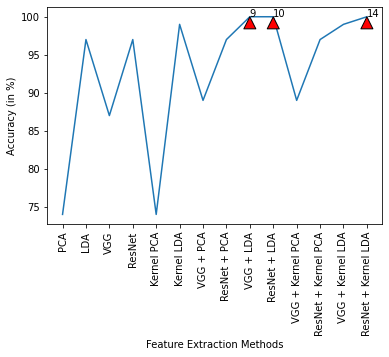

In [31]:
plt.plot(lbl, acc)

plt.xticks(rotation=90)
plt.annotate(9, (lbl[8], max(acc)), arrowprops=dict(facecolor="Red", shrink=0.05),)
plt.annotate(10, (lbl[9], max(acc)), arrowprops=dict(facecolor="Red", shrink=0.05),)
plt.annotate(14, (lbl[13], max(acc)), arrowprops=dict(facecolor="Red", shrink=0.05),)

plt.xlabel('Feature Extraction Methods')
plt.ylabel('Accuracy (in %)')

In [32]:
## For IIIT-CFW

print(' IIIT-CFW :')
acc1=[]
lbl1= []

test_accuracy, cm = MLP_PCA(X_1,y_1, 0.95, (1000,1000),350)
print("PCA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

test_accuracy, cm = MLP_LDA(X_1,y_1, None, (1000,1000),350)
print("LDA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

test_accuracy, cm = MLP_VGG(dirpath1,y_1, (1000,1000),350)
print("VGG with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

test_accuracy, cm = MLP_ResNet(dirpath1,y_1, (1000,1000),350)
print("ResNet with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

test_accuracy, cm = MLP_KPCA(X_1,y_1, 0.95, (1000,1000),350)
print("Kernel PCA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

test_accuracy, cm = MLP_KLDA(X_1,y_1, None, (1000,1000),350)
print("Kernel LDA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_vgg_features(dirpath1)
test_accuracy, cm = MLP_PCA(X_k,y_1, 0.95, (1000,1000),350)
print("VGG + PCA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_resnet_features(dirpath1)
test_accuracy, cm = MLP_PCA(X_k,y_1, 0.95, (1000,1000),350)
print("ResNet + PCA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_vgg_features(dirpath1)
test_accuracy, cm = MLP_LDA(X_k,y_1, None, (1000,1000),350)
print("VGG + LDA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_resnet_features(dirpath1)
test_accuracy, cm = MLP_LDA(X_k,y_1, None, (1000,1000),350)
print("ResNet + LDA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_vgg_features(dirpath1)
test_accuracy, cm = MLP_KPCA(X_k,y_1, 0.95, (1000,1000),350)
print("VGG + Kernel PCA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_resnet_features(dirpath1)
test_accuracy, cm = MLP_KPCA(X_k,y_1, 0.95, (1000,1000),350)
print("ResNet + Kernel PCA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_vgg_features(dirpath1)
test_accuracy, cm = MLP_KLDA(X_k,y_1, None, (1000,1000),350)
print("VGG + Kernel LDA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)

X_k = get_resnet_features(dirpath1)
test_accuracy, cm = MLP_KLDA(X_k,y_1, None, (1000,1000),350)
print("ResNet + Kernel LDA with MLP : " + str(test_accuracy*100))
acc1.append(test_accuracy*100)



 IIIT-CFW :
PCA with MLP : 52.38095238095239
LDA with MLP : 96.42857142857143
VGG with MLP : 72.02380952380952
ResNet with MLP : 97.61904761904762
Kernel PCA with MLP : 52.38095238095239
Kernel LDA with MLP : 98.80952380952381
VGG + PCA with MLP : 66.66666666666666
ResNet + PCA with MLP : 96.42857142857143
VGG + LDA with MLP : 97.61904761904762
ResNet + LDA with MLP : 100.0
VGG + Kernel PCA with MLP : 66.66666666666666
ResNet + Kernel PCA with MLP : 96.42857142857143
VGG + Kernel LDA with MLP : 96.42857142857143
ResNet + Kernel LDA with MLP : 100.0


Text(0, 0.5, 'Accuracy (in %)')

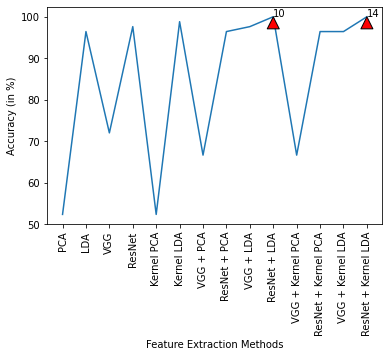

In [33]:
plt.plot(lbl, acc1)

plt.xticks(rotation=90)
plt.annotate(10, (lbl[9], max(acc1)), arrowprops=dict(facecolor="Red", shrink=0.05),)
plt.annotate(14, (lbl[13], max(acc1)), arrowprops=dict(facecolor="Red", shrink=0.05),)

plt.xlabel('Feature Extraction Methods')
plt.ylabel('Accuracy (in %)')

In [34]:
## For Yale Dataset

print(' Yale Dataset : ')
acc2=[]

test_accuracy, cm = MLP_PCA(X_2,y_2, 0.95, (1000,1000),350)
print("PCA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

test_accuracy, cm = MLP_LDA(X_2,y_2, None, (1000,1000),350)
print("LDA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

test_accuracy, cm = MLP_VGG(dirpath2,y_2, (1000,1000),350)
print("VGG with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

test_accuracy, cm = MLP_ResNet(dirpath2,y_2, (1000,1000),350)
print("ResNet with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

test_accuracy, cm = MLP_KPCA(X_2,y_2, 0.95, (1000,1000),350)
print("Kernel PCA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

test_accuracy, cm = MLP_KLDA(X_2,y_2, None, (1000,1000),350)
print("Kernel LDA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_vgg_features(dirpath2)
test_accuracy, cm = MLP_PCA(X_k,y_2, 0.95, (1000,1000),350)
print("VGG + PCA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_resnet_features(dirpath2)
test_accuracy, cm = MLP_PCA(X_k,y_2, 0.95, (1000,1000),350)
print("ResNet + PCA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_vgg_features(dirpath2)
test_accuracy, cm = MLP_LDA(X_2,y_2, None, (1000,1000),350)
print("VGG + LDA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_resnet_features(dirpath2)
test_accuracy, cm = MLP_LDA(X_2,y_2, None, (1000,1000),350)
print("ResNet + LDA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_vgg_features(dirpath2)
test_accuracy, cm = MLP_KPCA(X_k,y_2, 0.95, (1000,1000),350)
print("VGG + Kernel PCA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_resnet_features(dirpath2)
test_accuracy, cm = MLP_KPCA(X_k,y_2, 0.95, (1000,1000),350)
print("ResNet + Kernel PCA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_vgg_features(dirpath2)
test_accuracy, cm = MLP_KLDA(X_k,y_2, None, (1000,1000),350)
print("VGG + Kernel LDA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)

X_k = get_resnet_features(dirpath2)
test_accuracy, cm = MLP_KLDA(X_k,y_2, None, (1000,1000),350)
print("ResNet + Kernel LDA with MLP : " + str(test_accuracy*100))
acc2.append(test_accuracy*100)


 Yale Dataset : 
PCA with MLP : 85.71428571428571
LDA with MLP : 100.0
VGG with MLP : 50.0
ResNet with MLP : 97.61904761904762
Kernel PCA with MLP : 85.71428571428571
Kernel LDA with MLP : 100.0
VGG + PCA with MLP : 45.23809523809524
ResNet + PCA with MLP : 100.0
VGG + LDA with MLP : 100.0
ResNet + LDA with MLP : 100.0
VGG + Kernel PCA with MLP : 45.23809523809524
ResNet + Kernel PCA with MLP : 100.0
VGG + Kernel LDA with MLP : 78.57142857142857
ResNet + Kernel LDA with MLP : 100.0


Text(0, 0.5, 'Accuracy (in %)')

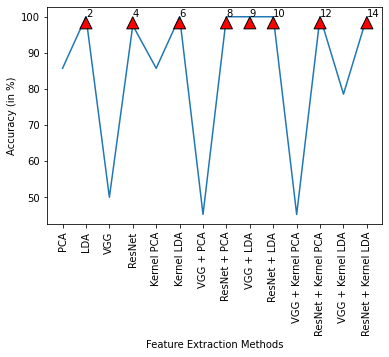

In [35]:
plt.plot(lbl, acc2)

plt.xticks(rotation=90)
for i in [1,3,5,7,8,9,11,13]:
    plt.annotate(i+1, (lbl[i], max(acc2)), arrowprops=dict(facecolor="Red", shrink=0.05),)

plt.xlabel('Feature Extraction Methods')
plt.ylabel('Accuracy (in %)')

In [36]:
for i in range(len(acc)):
    acc[i]= round(acc[i],2)
    acc1[i]= round(acc1[i],2)
    acc2[i]= round(acc2[i],2)

In [37]:


df = pd.DataFrame()
df = pd.DataFrame({'Feature Extraction Method': lbl})
df['IMFDB'] = pd.DataFrame(acc)
df['IIIT-CFW'] = pd.DataFrame(acc1)
df['Yale'] = pd.DataFrame(acc2)

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'blue' if val == 100 else 'black'
    return 'color: % s' % color

df.round(2).style.applymap(color_negative_red)

,Feature Extraction Method,IMFDB,IIIT-CFW,Yale
0,PCA,74.000000,52.380000,85.710000
1,LDA,97.000000,96.430000,100.000000
2,VGG,87.000000,72.020000,50.000000
3,ResNet,97.000000,97.620000,97.620000
4,Kernel PCA,74.000000,52.380000,85.710000
5,Kernel LDA,99.000000,98.810000,100.000000
6,VGG + PCA,89.000000,66.670000,45.240000
7,ResNet + PCA,97.000000,96.430000,100.000000
8,VGG + LDA,100.000000,97.620000,100.000000
9,ResNet + LDA,100.000000,100.000000,100.000000


3.Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? 

In [38]:
## t-SNE 

def tSNE(X,y, k, title ):
    X_TSNE = TSNE(n_components=k).fit_transform(X)
    fig = plt.figure(figsize=(2,2))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(np.real(X_TSNE[:,0]),np.real(X_TSNE[:,1]),c=y)
    plt.title(title)


 IMFDB : 


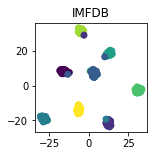

In [39]:
# t-SNE on IMFDB

X_k = get_resnet_features(dirpath)
X_k, klda = get_kernel_lda(X,y,7)
print('\n IMFDB : ')
tSNE(X_k,y,2, 'IMFDB')


 IIIT-CFW : 


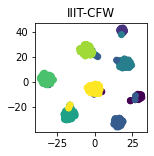

In [40]:
# t-SNE on IIIT-CFW

X_k, lda = get_lda(X_1,y_1,7)
print('\n IIIT-CFW : ')
tSNE(X_k,y_1,2, 'IIIT-CFW')


 Yale Database : 


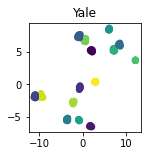

In [41]:
# t-SNE on IIIT-CFW

X_k, lda = get_kernel_lda(X_2,y_2,8)
print('\n Yale Database : ')
tSNE(X_k,y_2,2,'Yale')

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

4(c)Show empirical results  with  all  the  representations

In [42]:
class KNN_Classifier:
    def __init__(self,k):
        self.knn = KNeighborsClassifier(n_neighbors=k)
        
    def training(self,X_train, y_train):
        self.knn.fit(X_train,y_train)

        
    def validate(self,X_test,y_test ):
        y_pred = self.knn.predict(X_test)
        test_accuracy, f1, cm = self.confusion_matrix(X_test, y_test, y_pred )
        return test_accuracy,f1, cm
    
    def confusion_matrix(self,X_test,y_test, y_pred):
        cm = confusion_matrix(y_test,y_pred)
        f1 = f1_score(y_test,y_pred, average='macro')
        test_accuracy= self.knn.score(X_test,y_test)
        return test_accuracy,f1, cm

In [43]:
def KNN(X,y,k):
    X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)
    obj = KNN_Classifier(k)
    obj.training(X_train, y_train)
    test_accuracy,f1, cm = obj.validate(X_test,y_test)
    return test_accuracy, f1,cm

In [44]:
## KNN with PCA

def KNN_PCA(X, y, k_pca , k):
    X_k, pca = get_pca(X,k_pca)
    test_accuracy,f1, cm = KNN(X_k,y,k )
    return test_accuracy, f1,cm


## KNN with LDA

def KNN_LDA(X, y,  k_lda, k):
    X_k, lda = get_lda(X,y,k_lda)
    test_accuracy,f1, cm = KNN(X_k, y,k )
    return test_accuracy, f1,cm


## KNN with KPCA

def KNN_KPCA(X, y,  k_kpca , k):
    X_k, pca = get_kernel_pca(X,k_kpca)
    test_accuracy,f1, cm = KNN(X_k, y,k )
    return test_accuracy,f1, cm

## KNN with KLDA

def KNN_KLDA(X, y,  k_klda , k):
    X_k, lda = get_kernel_lda(X,y,k_klda)
    test_accuracy,f1, cm = KNN(X_k, y,k )
    return test_accuracy,f1, cm

## KNN with VGG_Face

def KNN_VGG(dirpath, y, k):
    
    X_k = get_vgg_features(dirpath)
    test_accuracy, f1,cm = KNN(X_k, y,k)
    return test_accuracy,f1, cm

## KNN with ResNet_Face

def KNN_ResNet(dirpath, y, k):
    X_k = get_resnet_features(dirpath)
    test_accuracy, f1,cm = KNN(X_k, y,k)
    return test_accuracy,f1, cm

In [45]:
## For IMFDB

k=1

print(' IMFDB (k : ' + str(k)+')')
acck =[]
f1_1=[]
lbl= []
test_accuracy,f1, cm = KNN_PCA(X,y, 0.95, k)
print("PCA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
f1_1.append(f1*100)
lbl.append('PCA')

test_accuracy, f1,cm = KNN_LDA(X,y, None, k)
print("LDA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
f1_1.append(f1*100)
lbl.append('LDA')

test_accuracy,f1, cm = KNN_VGG(dirpath,y, k)
print("VGG with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('VGG')
f1_1.append(f1*100)

test_accuracy,f1, cm = KNN_ResNet(dirpath,y, k)
print("ResNet with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('ResNet')
f1_1.append(f1*100)

test_accuracy, f1,cm = KNN_KPCA(X,y, 0.95, k)
print("Kernel PCA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('Kernel PCA')
f1_1.append(f1*100)

test_accuracy, f1,cm = KNN_KLDA(X,y, None, k)
print("Kernel LDA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('Kernel LDA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath)
test_accuracy,f1, cm = KNN_PCA(X_k,y, 0.95, k)
print("VGG + PCA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('VGG + PCA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath)
test_accuracy,f1, cm = KNN_PCA(X_k,y, 0.95, k)
print("ResNet + PCA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('ResNet + PCA')
f1_1.append(f1*100)


X_k = get_vgg_features(dirpath)
test_accuracy,f1, cm = KNN_LDA(X_k,y, None, k)
print("VGG + LDA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('VGG + LDA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath)
test_accuracy,f1, cm = KNN_LDA(X_k,y, None, k)
print("ResNet + LDA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('ResNet + LDA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath)
test_accuracy,f1, cm = KNN_KPCA(X_k,y, 0.95, k)
print("VGG + Kernel PCA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('VGG + Kernel PCA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath)
test_accuracy,f1, cm = KNN_KPCA(X_k,y, 0.95, k)
print("ResNet + Kernel PCA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('ResNet + Kernel PCA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath)
test_accuracy,f1, cm = KNN_KLDA(X_k,y, None, k)
print("VGG + Kernel LDA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('VGG + Kernel LDA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath)
test_accuracy,f1, cm = KNN_KLDA(X_k,y, None, k)
print("ResNet + Kernel LDA with KNN : " + str(test_accuracy*100))
acck.append(test_accuracy*100)
lbl.append('ResNet + Kernel LDA')
f1_1.append(f1*100)


 IMFDB (k : 1)
PCA with KNN : 69.0
LDA with KNN : 98.0
VGG with KNN : 90.0
ResNet with KNN : 94.0
Kernel PCA with KNN : 69.0
Kernel LDA with KNN : 98.0
VGG + PCA with KNN : 90.0
ResNet + PCA with KNN : 95.0
VGG + LDA with KNN : 100.0
ResNet + LDA with KNN : 100.0
VGG + Kernel PCA with KNN : 90.0
ResNet + Kernel PCA with KNN : 95.0
VGG + Kernel LDA with KNN : 99.0
ResNet + Kernel LDA with KNN : 100.0


In [46]:
## For IMFDB
k=10

print(' IIIT-CFW (k : ' + str(k)+')')

acck1 =[]
f1_1=[]
lbl= []
test_accuracy,f1, cm = KNN_PCA(X_1,y_1, 0.95, k)
print("PCA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
f1_1.append(f1*100)
lbl.append('PCA')

test_accuracy, f1,cm = KNN_LDA(X_1,y_1, None, k)
print("LDA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
f1_1.append(f1*100)
lbl.append('LDA')

test_accuracy,f1, cm = KNN_VGG(dirpath1,y_1, k)
print("VGG with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('VGG')
f1_1.append(f1*100)

test_accuracy,f1, cm = KNN_ResNet(dirpath1,y_1, k)
print("ResNet with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('ResNet')
f1_1.append(f1*100)

test_accuracy, f1,cm = KNN_KPCA(X_1,y_1, 0.95, k)
print("Kernel PCA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('Kernel PCA')
f1_1.append(f1*100)

test_accuracy, f1,cm = KNN_KLDA(X_1,y_1, None, k)
print("Kernel LDA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('Kernel LDA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath1)
test_accuracy,f1, cm = KNN_PCA(X_k,y_1, 0.95, k)
print("VGG + PCA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('VGG + PCA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath1)
test_accuracy,f1, cm = KNN_PCA(X_k,y_1, 0.95, k)
print("ResNet + PCA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('ResNet + PCA')
f1_1.append(f1*100)


X_k = get_vgg_features(dirpath1)
test_accuracy,f1, cm = KNN_LDA(X_k,y_1, None, k)
print("VGG + LDA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('VGG + LDA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath1)
test_accuracy,f1, cm = KNN_LDA(X_k,y_1, None, k)
print("ResNet + LDA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('ResNet + LDA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath1)
test_accuracy,f1, cm = KNN_KPCA(X_k,y_1, 0.95, k)
print("VGG + Kernel PCA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('VGG + Kernel PCA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath1)
test_accuracy,f1, cm = KNN_KPCA(X_k,y_1, 0.95, k)
print("ResNet + Kernel PCA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('ResNet + Kernel PCA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath1)
test_accuracy,f1, cm = KNN_KLDA(X_k,y_1, None, k)
print("VGG + Kernel LDA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('VGG + Kernel LDA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath1)
test_accuracy,f1, cm = KNN_KLDA(X_k,y_1, None, k)
print("ResNet + Kernel LDA with KNN : " + str(test_accuracy*100))
acck1.append(test_accuracy*100)
lbl.append('ResNet + Kernel LDA')
f1_1.append(f1*100)


 IIIT-CFW (k : 10)
PCA with KNN : 42.857142857142854
LDA with KNN : 97.02380952380952
VGG with KNN : 72.61904761904762
ResNet with KNN : 98.21428571428571
Kernel PCA with KNN : 42.857142857142854
Kernel LDA with KNN : 98.80952380952381
VGG + PCA with KNN : 74.40476190476191
ResNet + PCA with KNN : 97.61904761904762
VGG + LDA with KNN : 98.80952380952381
ResNet + LDA with KNN : 100.0
VGG + Kernel PCA with KNN : 74.40476190476191
ResNet + Kernel PCA with KNN : 97.61904761904762
VGG + Kernel LDA with KNN : 97.61904761904762
ResNet + Kernel LDA with KNN : 100.0


In [47]:
## For Yale

k=3

print(' Yale : (k : ' + str(k)+')')
print(k)

acck2 =[]
f1_1=[]
lbl= []
test_accuracy,f1, cm = KNN_PCA(X_2,y_2, 0.95, k)
print("PCA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
f1_1.append(f1*100)
lbl.append('PCA')

test_accuracy, f1,cm = KNN_LDA(X_2,y_2, None, k)
print("LDA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
f1_1.append(f1*100)
lbl.append('LDA')

test_accuracy,f1, cm = KNN_VGG(dirpath2,y_2, k)
print("VGG with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('VGG')
f1_1.append(f1*100)

test_accuracy,f1, cm = KNN_ResNet(dirpath2,y_2, k)
print("ResNet with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('ResNet')
f1_1.append(f1*100)

test_accuracy, f1,cm = KNN_KPCA(X_2,y_2, 0.95, k)
print("Kernel PCA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('Kernel PCA')
f1_1.append(f1*100)

test_accuracy, f1,cm = KNN_KLDA(X_2,y_2, None, k)
print("Kernel LDA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('Kernel LDA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath2)
test_accuracy,f1, cm = KNN_PCA(X_k,y_2, 0.95, k)
print("VGG + PCA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('VGG + PCA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath2)
test_accuracy,f1, cm = KNN_PCA(X_k,y_2, 0.95, k)
print("ResNet + PCA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('ResNet + PCA')
f1_1.append(f1*100)


X_k = get_vgg_features(dirpath2)
test_accuracy,f1, cm = KNN_LDA(X_k,y_2, None, k)
print("VGG + LDA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('VGG + LDA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath2)
test_accuracy,f1, cm = KNN_LDA(X_k,y_2, None, k)
print("ResNet + LDA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('ResNet + LDA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath2)
test_accuracy,f1, cm = KNN_KPCA(X_k,y_2, 0.95, k)
print("VGG + Kernel PCA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('VGG + Kernel PCA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath2)
test_accuracy,f1, cm = KNN_KPCA(X_k,y_2, 0.95, k)
print("ResNet + Kernel PCA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('ResNet + Kernel PCA')
f1_1.append(f1*100)

X_k = get_vgg_features(dirpath2)
test_accuracy,f1, cm = KNN_KLDA(X_k,y_2, None, k)
print("VGG + Kernel LDA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('VGG + Kernel LDA')
f1_1.append(f1*100)

X_k = get_resnet_features(dirpath2)
test_accuracy,f1, cm = KNN_KLDA(X_k,y_2, None, k)
print("ResNet + Kernel LDA with KNN : " + str(test_accuracy*100))
acck2.append(test_accuracy*100)
lbl.append('ResNet + Kernel LDA')
f1_1.append(f1*100)


 Yale : (k : 3)
3
PCA with KNN : 85.71428571428571
LDA with KNN : 100.0
VGG with KNN : 50.0
ResNet with KNN : 100.0
Kernel PCA with KNN : 85.71428571428571
Kernel LDA with KNN : 100.0
VGG + PCA with KNN : 52.38095238095239
ResNet + PCA with KNN : 100.0
VGG + LDA with KNN : 83.33333333333334
ResNet + LDA with KNN : 100.0
VGG + Kernel PCA with KNN : 52.38095238095239
ResNet + Kernel PCA with KNN : 100.0
VGG + Kernel LDA with KNN : 85.71428571428571
ResNet + Kernel LDA with KNN : 100.0


In [48]:

df = pd.DataFrame()
df = pd.DataFrame({'Feature Extraction Method': lbl})
df['IMFDB (k=1)'] = pd.DataFrame(acck)
df['IIIT-CFW (k=10)'] = pd.DataFrame(acck1)
df['Yale (k=3)'] = pd.DataFrame(acck2)

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'blue' if val == 100 else 'black'
    return 'color: % s' % color

df.round(2).style.applymap(color_negative_red)

,Feature Extraction Method,IMFDB (k=1),IIIT-CFW (k=10),Yale (k=3)
0,PCA,69.000000,42.860000,85.710000
1,LDA,98.000000,97.020000,100.000000
2,VGG,90.000000,72.620000,50.000000
3,ResNet,94.000000,98.210000,100.000000
4,Kernel PCA,69.000000,42.860000,85.710000
5,Kernel LDA,98.000000,98.810000,100.000000
6,VGG + PCA,90.000000,74.400000,52.380000
7,ResNet + PCA,95.000000,97.620000,100.000000
8,VGG + LDA,100.000000,98.810000,83.330000
9,ResNet + LDA,100.000000,100.000000,100.000000
